In [25]:
# Import data analysis libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
plt.style.use('ggplot')

import seaborn as sns


In [26]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10,8)

In [27]:
df = pd.read_csv('movies.csv')

In [28]:
# Look at the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<h2><b> Part 1: Data Cleaning </b> </h2> 

In [29]:
# Check for % missing data in each column 
for col in df.columns: 
    pct_missing = (df[col].isnull().sum())/len(df)
    print(f'{col} - {pct_missing}')

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [30]:
# Check column data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [31]:
# Drop any rows with null values 
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [33]:
pct_nulls = round(((7668-5421)/7668)*100, 2)
print(f"{pct_nulls}% of table contained nulls and those rows have been dropped from the table")

29.3% of table contained nulls and those rows have been dropped from the table


In [34]:
# Update datatypes of columns (floats with no decimal can be converted to int)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [35]:
# While examining data, noticed that year and released date have differing years on some records... 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [36]:
# Create corrected year column from release date column using regular expressions to match for YYYY format 
# Cast it to an integer format instead of string 

df['year_correct'] = df['released'].str.extract(pat='([0-9]{4})').astype('int64')
df.drop(['year'], axis=1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [37]:
# Order movies by highest to least gross revenue 

df = df.sort_values(by=['gross'], ascending=False)

In [38]:
# Drop any duplicates
print(len(df))
df.drop_duplicates()
print(len(df))
# No duplicates found 

5421
5421


<h2><b> Part 2: Correlation </b> </h2><br>
Hypothesis is that budget and gross revenue have high correlation<br>
Analysis for any other features that have high correlation with gross revenue 

Text(0, 0.5, 'Budget for film')

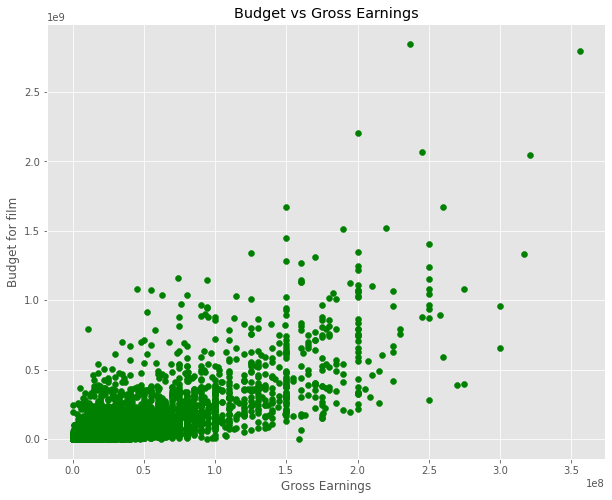

In [39]:
# Scatter plot with budget vs gross revenue using matplotlib functional graphing method...

plt.scatter(x=df['budget'],y=df['gross'],color='green')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

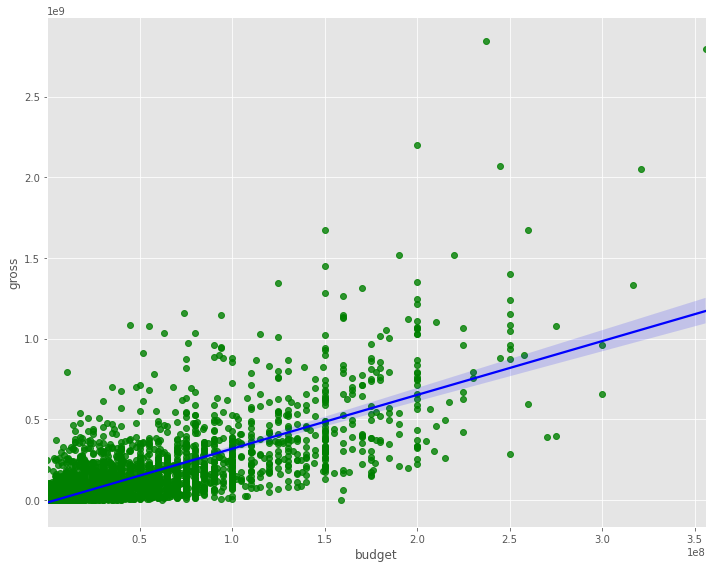

In [40]:
# Use seaborn to make a regression plot for budget vs gross

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"green"},line_kws={"color":"blue"})
plt.tight_layout()

In [41]:
# Pearson correlation matrix for all numeric values  
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(68.59375, 0.5, 'Movie Features')

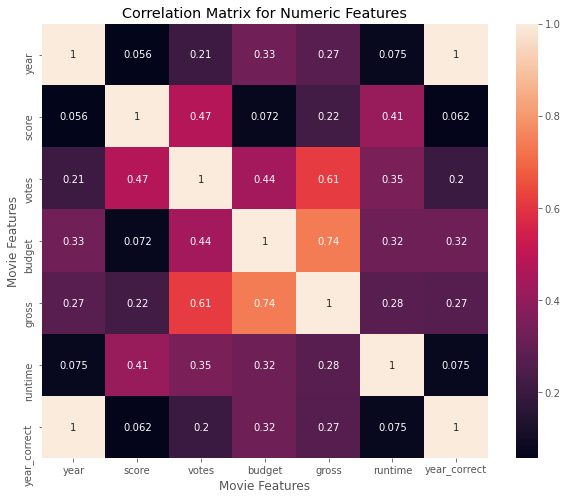

In [42]:
# Vizualize the correlations with a heatmap using Seaborn 

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [43]:
# Correlation b/w company and gross earnings
# Make all columns numeric so we can compare 

df_numeric = df.copy()
for col in df_numeric.columns: 
    if(df_numeric[col].dtype =='object'):
        df_numeric[col] = df_numeric[col].astype('category').cat.codes
        
df_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,2015
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,1994
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,2001
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,1982


Text(68.59375, 0.5, 'Movie Features')

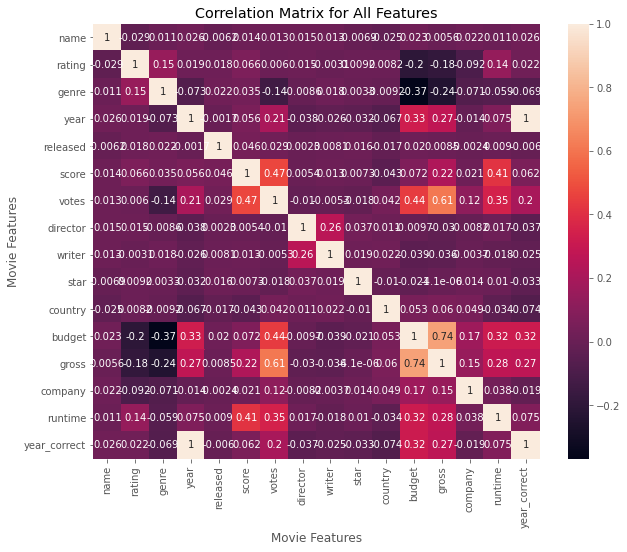

In [44]:
# Correlation heatmap for all features 
correlation_matrix2 = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [45]:
# Filter for correlations > .5 or any threshold, and eliminate the correlations of value to itself 
correlation_pairs = df_numeric.corr().unstack()
correlation_pairs[(correlation_pairs.values != 1) & (correlation_pairs.values > .5)].sort_values(ascending=False)

year          year_correct    0.998726
year_correct  year            0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64

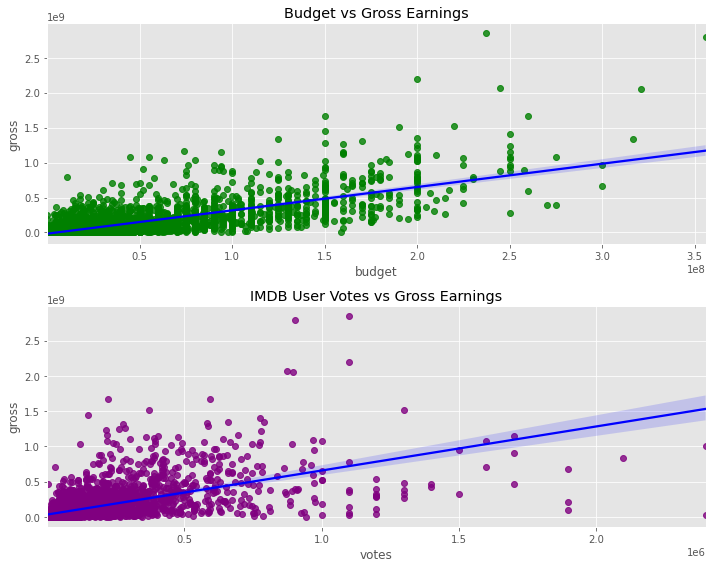

In [46]:
# Resulting plots from the two highest correlation features (User Votes and Movie Budget) to Gross Revenue 
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"green"},line_kws={"color":"blue"}, ax=axes[0])
axes[0].set_title('Budget vs Gross Earnings')
sns.regplot(x='votes',y='gross',data=df, scatter_kws={"color":"purple"},line_kws={"color":"blue"}, ax=axes[1])
axes[1].set_title('IMDB User Votes vs Gross Earnings')
plt.tight_layout()

<h2> Part 3: Additional Analysis </h2> 

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


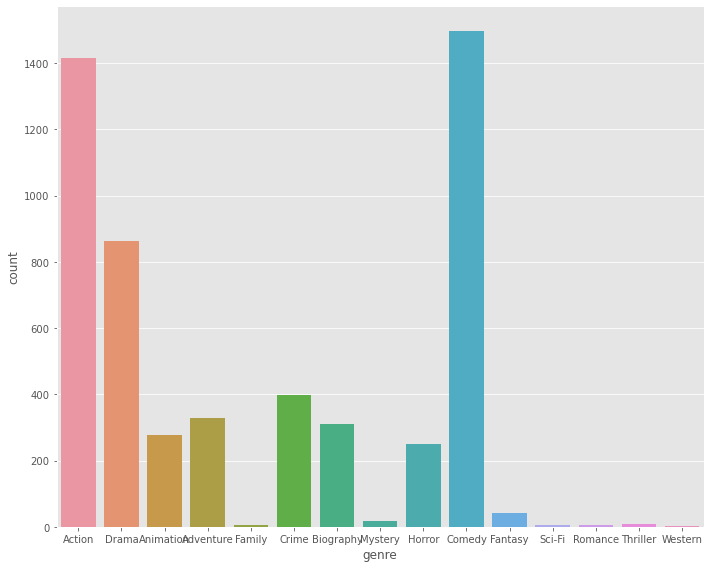

In [70]:
sns.countplot(x='genre', data=df)
plt.tight_layout()
# Comedy, Action, and Drama are the most common movie genre on IMDB

In [74]:
df.groupby('genre').mean()['gross'].sort_values(ascending=False)[0:3]
# Family, Animation, and Action movies have the highest average gross revenue 

genre
Family       5.185831e+08
Animation    2.811044e+08
Action       1.680232e+08
Name: gross, dtype: float64

In [76]:
df.groupby('director').mean()['gross'].sort_values(ascending=False)[0:5]
# Top 5 directors with highest average gross revenue for their movies overall 

director
Anthony Russo    1.368850e+09
Kyle Balda       1.097122e+09
Josh Cooley      1.073395e+09
Chris Buck       1.059909e+09
Joss Whedon      9.873567e+08
Name: gross, dtype: float64

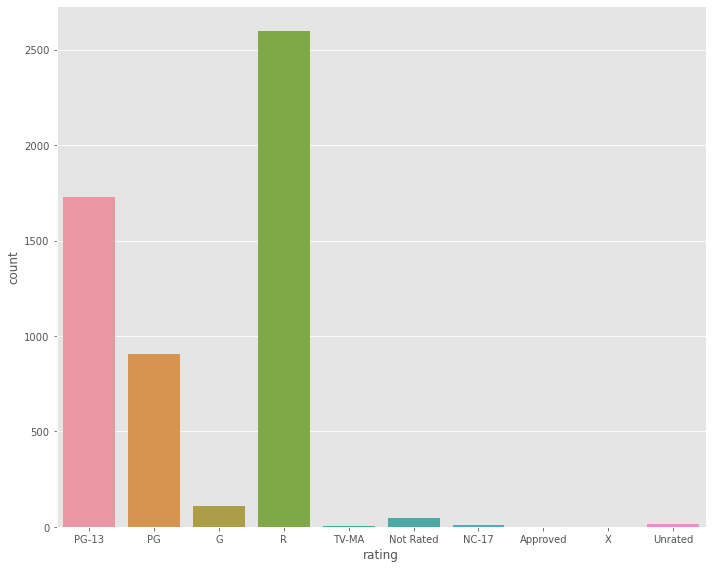

In [80]:
sns.countplot(x='rating', data=df)
plt.tight_layout()
# Most common ratings for movies are R, then PG-13 then PG.. but are they the most popular?

<AxesSubplot:xlabel='rating', ylabel='gross'>

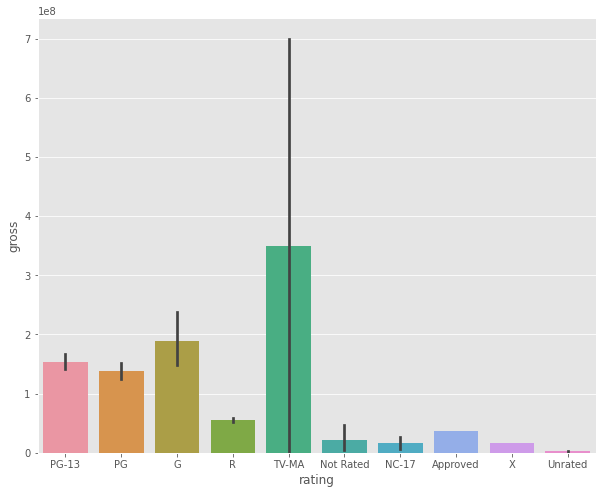

In [78]:
sns.barplot(x='rating',y='gross', data=df)

# Although R rated movies are the most common, TV-MA, G, PG-13 and PG movies all result in greater average revenue. 

Text(0, 0.5, 'Gross Revenue in U.S. dollars (billions)')

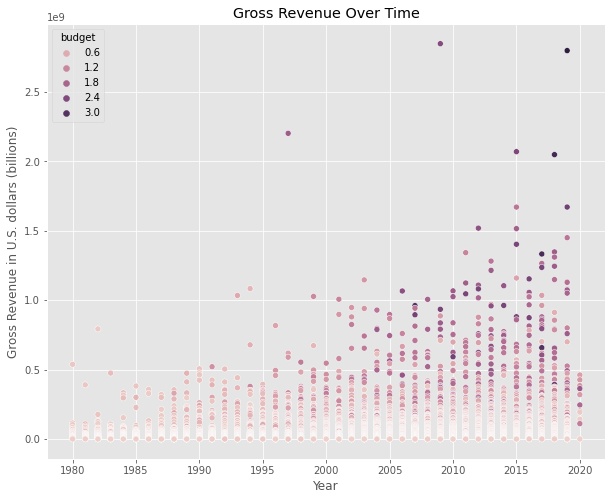

In [94]:
sns.scatterplot(x='year_correct',y='gross',data=df, hue='budget')
plt.title('Gross Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Revenue in U.S. dollars (billions)')

# Gross revenue possible for a movie has gone up significantly over time, and highest grossing movies tend to have larger budgets 

Text(0.5, 6.79999999999999, 'Gross Revenue in U.S. dollars (billions)')

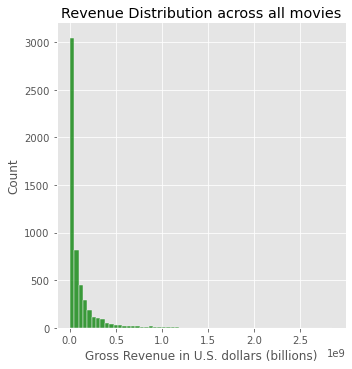

In [113]:
sns.displot(df['gross'], bins=60, color='g')
plt.title('Revenue Distribution across all movies')
plt.xlabel('Gross Revenue in U.S. dollars (billions)')

# The vast majority of movies made do not make more than 50 million U.S.$